In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from matplotlib.backends.backend_pdf import PdfPages
from pylab import savefig
from matplotlib.figure import Figure

# 1. Prepare Data

In [4]:
dataset = pd.read_csv("../1. Exploration Data Analysis and Data Visualization/creditcard.csv")



I delete features *Time* and *Amount* that do not provide useful information to reach the set goal.

In [6]:
df_NoTime_NoAmount = dataset.drop(['Time', 'Amount'], axis=1)


# 2. Dataset division about classes 

I create two data frames:
* class_1: it contains all non-fraudulent transactions (0)
* class_2: contains all fraudulent transactions(1)

In [7]:
class_1 = df_NoTime_NoAmount[df_NoTime_NoAmount['Class'] == 0].copy()
class_2 = df_NoTime_NoAmount[df_NoTime_NoAmount['Class'] == 1].copy()

# 3. Probability Density Function for each features

PDF: **Probability density function** is a statistical expression that defines a probability distribution for a continuous random variable with respect to a discrete random variable.
This function is represented graphically, the area under the curve indicates the interval in which the variable will fall. The total area in this range is equal to the probability that a continuous random variable will occur.

Below is generated a document (pdf) with the PDF for each single feature distinguishing the two classes (0 and 1)

C:\Users\Pappa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Pappa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Pappa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Pappa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Pappa\Anaconda3\lib\site-pack

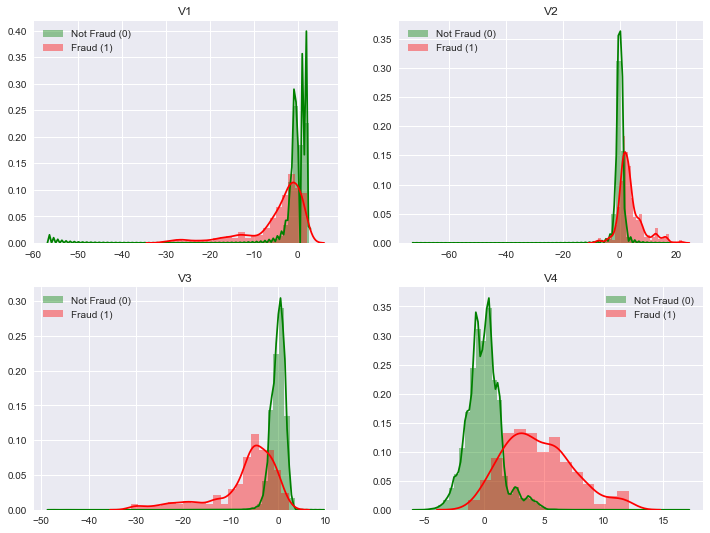

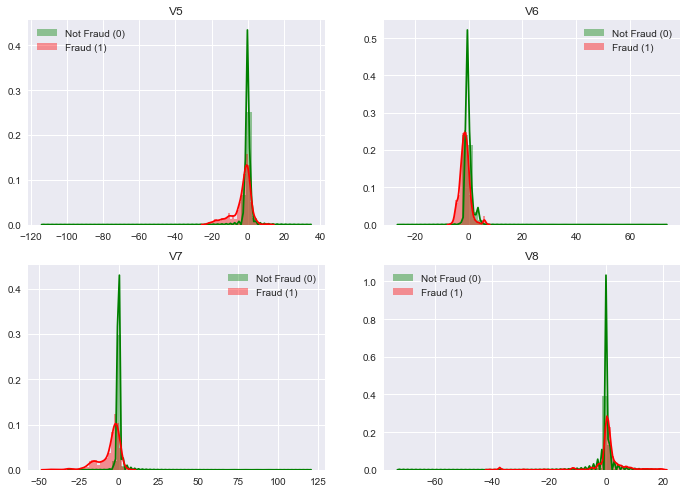

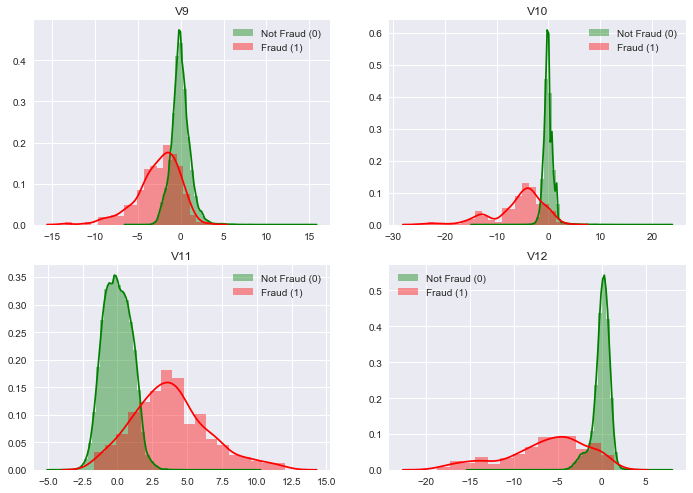

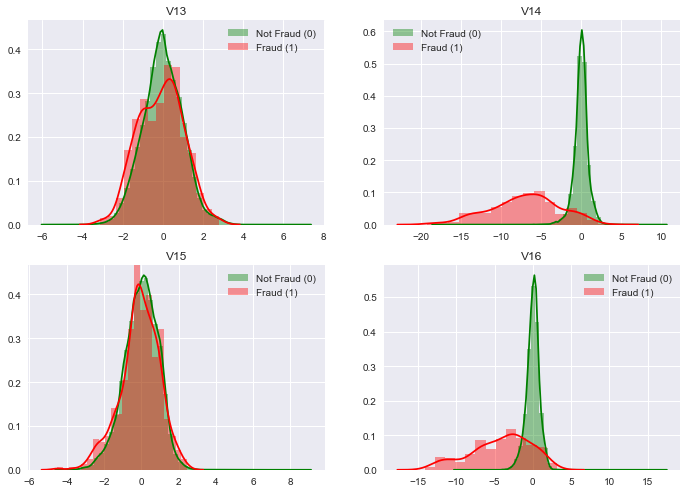

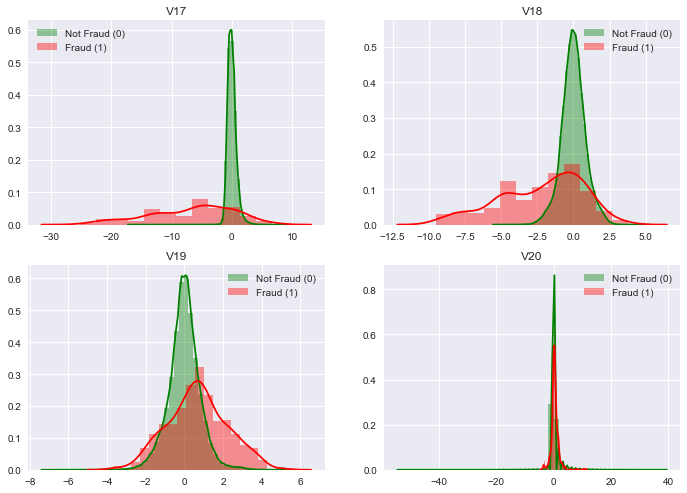

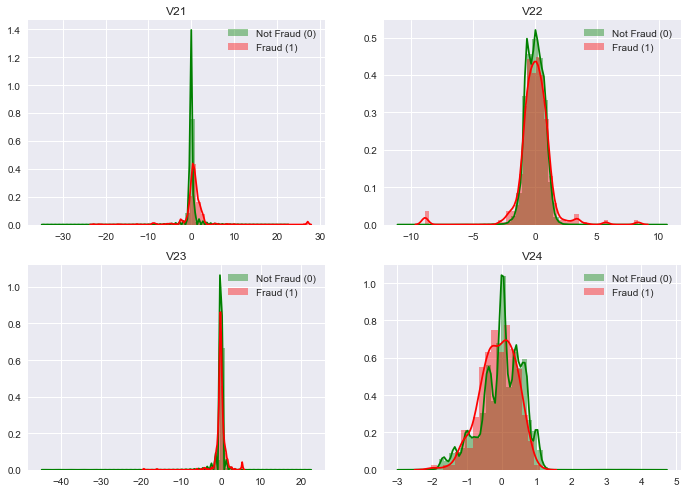

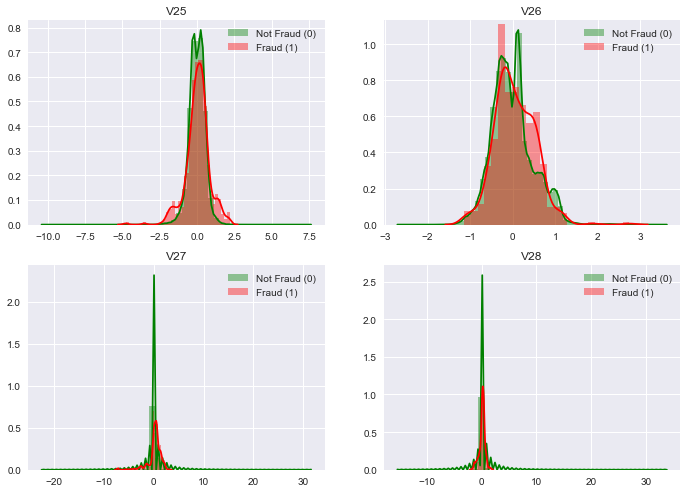

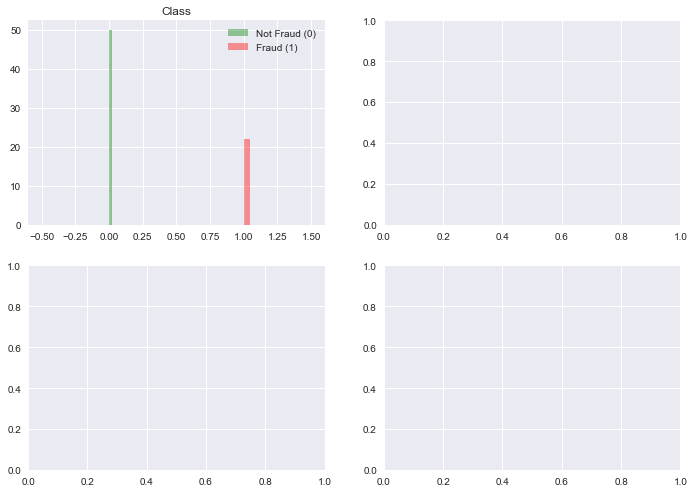

In [9]:
fig, ax = plt.subplots(figsize=(12,9),ncols=2, nrows=2)
row = 0
col = 0
pag = 0
with PdfPages('Features_Distributions_V1toV28.pdf') as pdf_pages:
    for column in df_NoTime_NoAmount.columns.values:
        ax[row%2][col%2].set_title(column)
        
        #Class 1
        sns.distplot(class_1[column].values, ax=ax[row%2][col%2], label="Not Fraud (0)", color='green')
        
        #Class 2
        countplot = sns.distplot(class_2[column].values, ax=ax[row%2][col%2], label="Fraud (1)", color='red')
        countplot.legend()
        
        col = col+1
        if col%2 == 0:
            row = row+1
        

        if col%2 == 0 and row%2==0:
            pdf_pages.savefig(fig, papertype = 'a4', orientation = 'portrait')
            fig, ax = plt.subplots(figsize=(11.69,8.27),ncols=2, nrows=2)
            
    pdf_pages.savefig(fig, papertype = 'a4', orientation = 'portrait')